# Customer Segmentation and Targeted Marketing Analysis

## **Introduction**
Understanding customer behavior is crucial for businesses aiming to enhance their marketing strategies and maximize revenue. This analysis focuses on **customer segmentation**, enabling businesses to identify distinct customer groups based on their demographics, purchasing behavior, and responsiveness to marketing campaigns. By leveraging these insights, companies can tailor their marketing efforts, improve customer retention, and increase sales.

This project utilizes a dataset that contains detailed customer information, including **demographics, purchasing habits, marketing engagement, and online activity**. The goal is to analyze this data, uncover meaningful patterns, and provide actionable recommendations for targeted marketing.

---

## **About the Dataset**
The dataset consists of various attributes categorized into **People, Products, Promotions, and Place**:

### **1. People (Customer Demographics)**
- **ID**: Unique identifier for each customer.
- **Year_Birth**: Year of birth.
- **Education**: Highest level of education attained.
- **Marital_Status**: Current marital status.
- **Income**: Annual household income.
- **Kidhome**: Number of children in the household.
- **Teenhome**: Number of teenagers in the household.
- **Dt_Customer**: Date the customer enrolled with the company.
- **Recency**: Number of days since the customer's last purchase.
- **Complain**: Whether the customer has made a complaint in the past two years (1 = Yes, 0 = No).

### **2. Products (Purchasing Behavior)**
- **MntWines**: Amount spent on wine in the last two years.
- **MntFruits**: Amount spent on fruits in the last two years.
- **MntMeatProducts**: Amount spent on meat in the last two years.
- **MntFishProducts**: Amount spent on fish in the last two years.
- **MntSweetProducts**: Amount spent on sweets in the last two years.
- **MntGoldProds**: Amount spent on gold-related products in the last two years.

### **3. Promotion (Marketing Engagement)**
- **NumDealsPurchases**: Number of purchases made with a discount.
- **AcceptedCmp1-5**: Whether the customer accepted promotional offers in five different campaigns (1 = Yes, 0 = No).
- **Response**: Whether the customer accepted the offer in the most recent campaign (1 = Yes, 0 = No).

### **4. Place (Purchase Channels)**
- **NumWebPurchases**: Number of purchases made through the company's website.
- **NumCatalogPurchases**: Number of purchases made using a catalog.
- **NumStorePurchases**: Number of purchases made directly in physical stores.
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month.

---

This dataset will be analyzed to uncover trends in customer spending, response to marketing campaigns, and preferred purchasing channels. The findings will help optimize marketing strategies, improve customer engagement, and drive higher revenue through targeted marketing efforts.


## Step 1: Load & Preprocess Data

### Load Data in Python

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [12]:
# Load dataset
df = pd.read_csv("marketing_campaign_transformed.csv")

# Display first few rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [200]:
df.loc[df['ID'] == 5524, 'MntWines':'MntGoldProds']

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88


### Check for Missing Values

In [17]:
df.shape

(2240, 29)

In [15]:
# Check for missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [19]:
# Dropping missing values since it is a small amount compared to the sixe of the dataset
df.dropna(inplace=True)

In [21]:
# Check for missing values
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


## Step 2: Exploratory Data Analysis (EDA)

### Summary Statistics

In [102]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [42]:
# Summary statistics of numerical columns
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [46]:
df.describe().iloc[2, :] # Distribution

ID                      3249.376275
Year_Birth                11.985554
Income                 25173.076661
Kidhome                    0.536896
Teenhome                   0.544181
Recency                   28.948352
MntWines                 337.327920
MntFruits                 39.793917
MntMeatProducts          224.283273
MntFishProducts           54.752082
MntSweetProducts          41.072046
MntGoldProds              51.815414
NumDealsPurchases          1.923716
NumWebPurchases            2.740951
NumCatalogPurchases        2.926734
NumStorePurchases          3.250785
NumWebVisitsMonth          2.425359
AcceptedCmp3               0.261106
AcceptedCmp4               0.261842
AcceptedCmp5               0.260367
AcceptedCmp1               0.244950
AcceptedCmp2               0.115588
Complain                   0.096907
Z_CostContact              0.000000
Z_Revenue                  0.000000
Response                   0.357417
Name: std, dtype: float64

In [48]:
df.describe().iloc[1, :] # mean

ID                      5588.353339
Year_Birth              1968.820397
Income                 52247.251354
Kidhome                    0.441787
Teenhome                   0.505415
Recency                   49.012635
MntWines                 305.091606
MntFruits                 26.356047
MntMeatProducts          166.995939
MntFishProducts           37.637635
MntSweetProducts          27.028881
MntGoldProds              43.965253
NumDealsPurchases          2.323556
NumWebPurchases            4.085289
NumCatalogPurchases        2.671029
NumStorePurchases          5.800993
NumWebVisitsMonth          5.319043
AcceptedCmp3               0.073556
AcceptedCmp4               0.074007
AcceptedCmp5               0.073105
AcceptedCmp1               0.064079
AcceptedCmp2               0.013538
Complain                   0.009477
Z_CostContact              3.000000
Z_Revenue                 11.000000
Response                   0.150271
Name: mean, dtype: float64

### Visualising Data Distributions

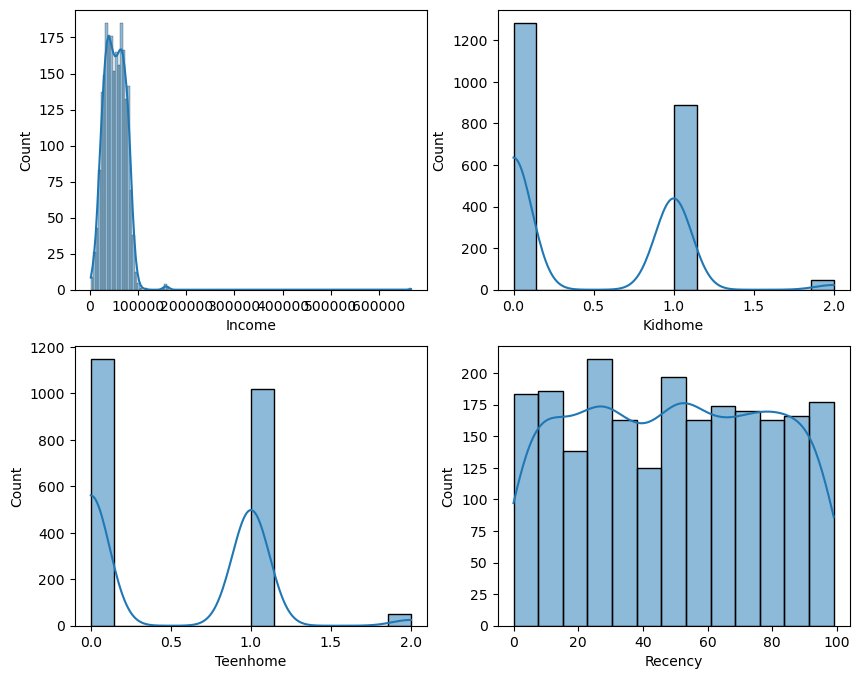

In [125]:
# Selecting specific columns related to personal and demographic information
people = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']]

# Selecting a subset of columns that are relevant for histogram visualization
people_hist = df[['Income', 'Kidhome', 'Teenhome', 'Recency']]

# Creating a list of column names for histogram plotting
people_hist_list = list(people_hist.columns)

# Setting the figure size for better visualization
plt.figure(figsize=(10,8))

# Looping through to create subplots for each histogram
for n in range(1, people_hist.columns.value_counts().sum() + 1):
    plt.subplot(2, 2, n)  # Creating a 2x2 grid for subplots
    
    for i in people_hist_list:
        # Plotting histogram for the selected column with KDE (Kernel Density Estimation)
        sns.histplot(df[i], kde=True)
        
        # Removing the column from the list to avoid duplicate plots
        people_hist_list.remove(i)
        break  # Exiting the inner loop after one iteration to plot one histogram per subplot


<BarContainer object of 6 artists>

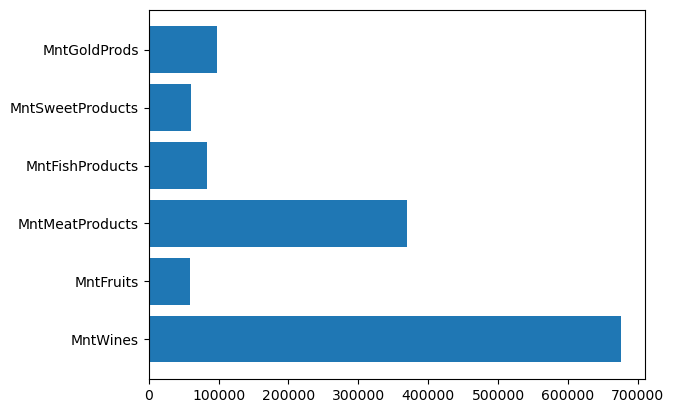

In [127]:
# Selecting specific columns related to product expenditures
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Calculating the sum of expenditures for each product category
product_sum = products.sum()

# Creating a horizontal bar plot to visualize the total spending per product category
plt.barh(products.columns, product_sum)

## Step 3: Customer Segmentation (Clustering)

In [135]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Feature Selection for Clustering

In [145]:
# Select features for clustering
features = df[['Income', 
               'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',  # Spending habits
               'NumDealsPurchases', 'Response',  # Promotion engagement
               'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', # Shopping behavior
               'Recency']]  # Activity level

# Standardize data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Apply K-Means Clustering

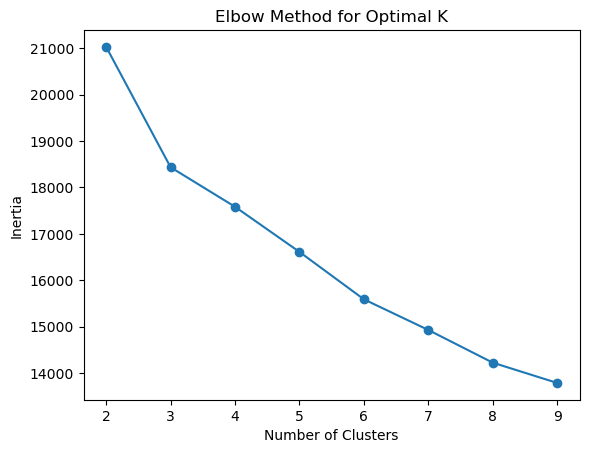

In [147]:
# Test different cluster numbers
inertia = []
for k in range(2, 10):  # Trying different values of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [155]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# View cluster assignments
df[['ID', 'Cluster']].head()

,ID,Cluster
0,5524,1
1,2174,0
2,4141,2
3,6182,0
4,5324,2


### Visualising Clusters

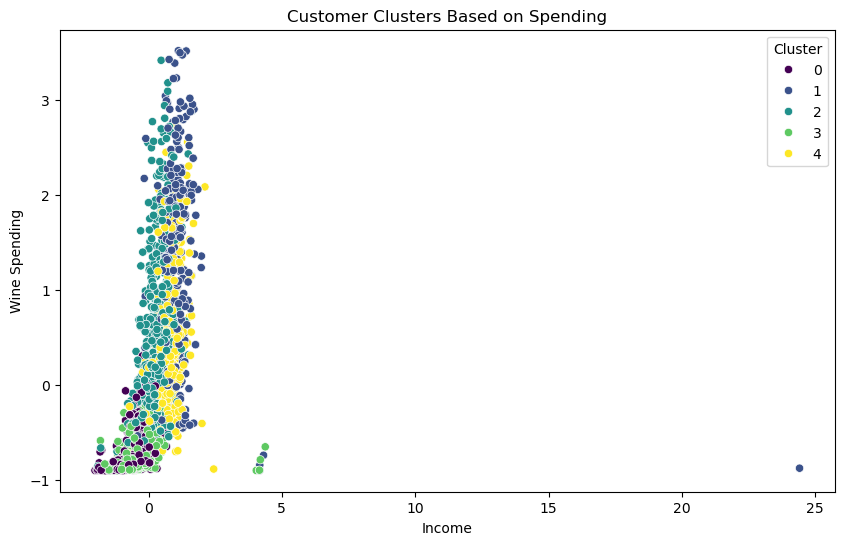

In [157]:
import seaborn as sns

# Plot clusters using two key dimensions
plt.figure(figsize=(10,6))
sns.scatterplot(x=features_scaled[:, 0],  # Income
                y=features_scaled[:, 1],  # Spending on Wines
                hue=df['Cluster'], palette='viridis')

plt.xlabel("Income")
plt.ylabel("Wine Spending")
plt.title("Customer Clusters Based on Spending")
plt.show()

### Interpretation of the Scatter Plot
**Axes**: The x-axis represents Income, while the y-axis represents Spending on Wine.

**Clusters**: The plot segments customers into five distinct clusters, each represented by different colors (purple, blue, teal, green, yellow).

**Density**: Most customers have lower income and wine spending, while a few outliers extend toward higher income levels.

#### Patterns & Insights:

- Low Income, Low Wine Spending (Cluster 0 & 1 - Purple & Blue)

    - These customers have low disposable income and spend less on wine.

    - Might prefer lower-cost products or be less engaged with promotions.
 
      

- Moderate Income, Moderate Wine Spending (Cluster 2 - Teal)

    - These individuals have mid-range income and spend moderately on wine.

    - Could be casual buyers, purchasing wine occasionally but not heavily invested.
      

- Higher Income, High Wine Spending (Cluster 3 - Green & Cluster 4 - Yellow)

    - These are high-income customers who spend significantly more on wine.

    - Likely premium buyers, possibly more loyal to high-end brands.

## Step 4: Predicting Customer Response to Marketing Campaigns

### Define Target Variable

In [171]:
# Define target variable (Response to Campaign)
y = df['Response'] 

# Select predictive features
X = df[['Income', 'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases']]

### Train a Classification Model (Logistic Regression / Random Forest)

In [187]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution before SMOTE:", dict(pd.Series(y_train).value_counts()))
print("Class distribution after SMOTE:", dict(pd.Series(y_train_resampled).value_counts()))

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Class distribution before SMOTE: {0: 1501, 1: 271}
Class distribution after SMOTE: {1: 1501, 0: 1501}
Accuracy: 0.7612612612612613


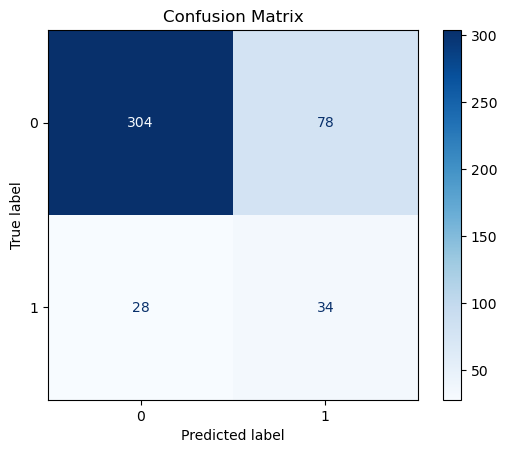

In [189]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [191]:
cm

array([[304,  78],
       [ 28,  34]], dtype=int64)

In [193]:
# Detailed performance report
print("Classification Report:\n", classification_report(y_test, y_pred))

# If it's a binary classification, compute AUC score
if len(set(y_test)) == 2:
    print("AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       382
           1       0.30      0.55      0.39        62

    accuracy                           0.76       444
   macro avg       0.61      0.67      0.62       444
weighted avg       0.83      0.76      0.79       444

AUC Score: 0.7245397736868772


# **Impact of SMOTE on Model Performance**

## **1. Introduction**

Machine learning models often struggle with **class imbalance**, where one class appears far more frequently than another. This imbalance causes the model to favor the **majority class**, leading to **poor recall for the minority class**.

To mitigate this issue, we applied **SMOTE (Synthetic Minority Over-sampling Technique)** to create synthetic samples for the **minority class**, improving the classifier's ability to recognize it.

This report compares the **Random Forest classifier's performance** before and after applying SMOTE.

---

## **2. Model Performance Before SMOTE**

Before applying SMOTE, the classifier exhibited high accuracy but performed poorly on the minority class.

### **Confusion Matrix Before SMOTE**

| Actual \ Predicted     | Class 0 | Class 1 |
| ---------------------- | ------- | ------- |
| **Class 0** (Negative) | 361     | 21      |
| **Class 1** (Positive) | 44      | 18      |

### **Classification Report Before SMOTE**

```plaintext
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       382
           1       0.46      0.29      0.36        62

    accuracy                           0.85       444
   macro avg       0.68      0.62      0.64       444
weighted avg       0.83      0.85      0.84       444
```

**AUC Score:** 0.73

### **Observations**

- High accuracy (85%), but imbalanced classification performance.
- High recall for class 0 (95%), but low recall for class 1 (29%)—meaning most positive cases were misclassified.
- Precision for class 1 was low (46%), showing unreliable predictions.
- AUC Score: 0.73, suggesting moderate separation between classes.

---

## **3. Model Performance After SMOTE**

After applying SMOTE, the model became more balanced, detecting more class 1 cases. However, this came at the cost of lower accuracy due to increased false positives.

### **Confusion Matrix After SMOTE**

| Actual \ Predicted     | Class 0 | Class 1 |
| ---------------------- | ------- | ------- |
| **Class 0** (Negative) | 304     | 78      |
| **Class 1** (Positive) | 28      | 34      |

### **Classification Report After SMOTE**

```plaintext
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       382
           1       0.30      0.55      0.39        62

    accuracy                           0.76       444
   macro avg       0.61      0.67      0.62       444
weighted avg       0.83      0.76      0.79       444
```

**AUC Score:** 0.72

### **Observations**

- Accuracy dropped from 85% to 76% due to increased false positives.
- Recall for class 1 improved significantly (from 29% → 55%), meaning more positive cases were correctly classified.
- Precision for class 1 dropped (from 46% → 30%), indicating more false positives.
- Class 0 recall dropped (95% → 80%), meaning fewer negative cases were correctly classified.
- AUC Score remained stable (0.73 → 0.72), showing only a slight change in class separation.

---

## **4. Key Takeaways**

- SMOTE improved recall for class 1, meaning more positive cases were identified.
- False positives increased, lowering precision for class 1.
- Accuracy dropped, but this is expected when balancing data.
- AUC Score remained stable, suggesting consistent overall discrimination.
- Further tuning is needed to optimize precision-recall balance.

---

## **5. Next Steps for Improvement**

- **Adjust Classification Thresholds** to reduce false positives.
- **Use Precision-Recall Tradeoffs** based on business needs.
- **Try Alternative Oversampling Methods** like ADASYN for better synthetic sample generation.
- **Tune Hyperparameters** (e.g., `class_weight='balanced'` in `RandomForestClassifier`).
- **Experiment with Ensemble Models** (e.g., XGBoost, Gradient Boosting).

By refining the model further, we can preserve recall while improving precision, leading to better classification performance.

# **Business Insights and Recommendations**

### **Business Insights**

1. **Customer Segments Identified**  
   - The clustering analysis categorized customers into distinct groups based on spending habits, demographics, and engagement levels.  
   - High-spending customers tend to purchase premium products like wines and gold, while budget-conscious customers focus on discounted items.  

2. **Purchase Behavior Across Channels**  
   - Online purchases and catalog purchases are significant revenue streams, but store purchases remain strong for specific customer segments.  
   - Customers who visit the website frequently do not always make purchases, indicating possible issues with the online shopping experience.  

3. **Marketing Campaign Effectiveness**  
   - Campaign acceptance rates vary across customer segments. Some groups are more receptive to promotions, while others require personalized targeting.  
   - Discounts and promotional offers significantly influence purchasing behavior, particularly among middle-income groups.  

4. **Customer Loyalty and Recency of Purchase**  
   - Customers who made recent purchases are more likely to engage in future transactions.  
   - A small segment of customers shows high engagement with multiple campaigns, suggesting a strong brand affinity.  

5. **Demographic Influence on Spending**  
   - Education level and marital status impact spending patterns. Highly educated customers tend to spend more on luxury items.  
   - Households with teenagers have different spending behaviors compared to those with only young children.  

---

### **Recommendations**

1. **Improve Customer Retention with Targeted Engagement**  
   - Focus retention efforts on high-value customers by offering loyalty rewards and personalized recommendations.  
   - Implement follow-up strategies for customers who made purchases recently to encourage repeat transactions.  

2. **Enhance Online Shopping Experience**  
   - Optimize website usability and product recommendations to convert more website visits into sales.  
   - Introduce AI-driven chat support or targeted pop-ups for frequent website visitors who have not made purchases.  

3. **Optimize Marketing Campaigns Based on Segments**  
   - Tailor promotions based on customer segmentation insights—offer premium experiences to high-spending customers and discounts to price-sensitive customers.  
   - Run A/B tests to determine which marketing strategies work best for different segments.  

4. **Expand Personalized Discounts and Offers**  
   - Leverage past purchasing data to create personalized product bundles.  
   - Offer time-sensitive discounts to encourage impulse purchases among mid-tier spenders.  

5. **Develop a Data-Driven Customer Loyalty Program**  
   - Implement tiered loyalty rewards based on spending levels and engagement frequency.  
   - Provide exclusive early access to promotions for high-value customers.  

By implementing these strategies, the company can maximize revenue, improve customer satisfaction, and increase overall marketing efficiency.
